In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [5]:
df = pd.read_csv('ml-data.csv', delimiter=',', encoding= 'unicode_escape')
df.head(2)

,Id,Age,Race,Sex,Diagnosed,Diagnosed group,Stage,Months,Site,Sequence number,...,COD,COD2,Report,Property,Tumor size,Tumor size group,Surgery,Chemotherapy,Radiotherapy,Survive
0,22929427,15-19,White,Male,1975,1975-1999,Regional,31.0,Bones and Joints,One primary only,...,Bones and Joints,Dead (attributable to this cancer dx),Hospital inpatient/outpatient or clinic,"$75,000+",94.0,85-115,No,No,No,Dead in 5
1,10123011,05-09,White,Male,1975,1975-1999,Regional,23.0,Bones and Joints,One primary only,...,Bones and Joints,Dead (attributable to this cancer dx),Hospital inpatient/outpatient or clinic,"$75,000+",94.0,85-115,No,No,No,Dead in 5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                2581 non-null   int64  
 1   Age               2581 non-null   object 
 2   Race              2581 non-null   object 
 3   Sex               2581 non-null   object 
 4   Diagnosed         2581 non-null   int64  
 5   Diagnosed group   2581 non-null   object 
 6   Stage             2581 non-null   object 
 7   Months            2581 non-null   float64
 8   Site              2581 non-null   object 
 9   Sequence number   2581 non-null   object 
 10  Malignat number   2581 non-null   int64  
 11  COD               2581 non-null   object 
 12  COD2              2581 non-null   object 
 13  Report            2581 non-null   object 
 14  Property          2581 non-null   object 
 15  Tumor size        2581 non-null   float64
 16  Tumor size group  2581 non-null   object 


In [7]:
df = df.drop(['Diagnosed group','Months','Tumor size','COD2'], axis = 1)

In [8]:
df = df.drop(['Id'], axis = 1)

In [9]:
df = df.drop(['Malignat number'], axis = 1)

In [10]:
df.head(150)

,Age,Race,Sex,Diagnosed,Stage,Site,Sequence number,COD,Report,Property,Tumor size group,Surgery,Chemotherapy,Radiotherapy,Survive
0,15-19,White,Male,1975,Regional,Bones and Joints,One primary only,Bones and Joints,Hospital inpatient/outpatient or clinic,"$75,000+",85-115,No,No,No,Dead in 5
1,05-09,White,Male,1975,Regional,Bones and Joints,One primary only,Bones and Joints,Hospital inpatient/outpatient or clinic,"$75,000+",85-115,No,No,No,Dead in 5
2,15-19,White,Male,1975,Distant,Bones and Joints,One primary only,Bones and Joints,Hospital inpatient/outpatient or clinic,"< $60,999",85-115,No,Yes,No,Dead in 5
3,15-19,White,Male,1975,Regional,Bones and Joints,One primary only,Bones and Joints,Hospital inpatient/outpatient or clinic,"$60,000 - $74,999",85-115,No,Yes,No,Dead in 5
4,15-19,White,Male,1975,Localized,Bones and Joints,One primary only,Bones and Joints,Hospital inpatient/outpatient or clinic,"< $60,999",> 115,Yes,No,No,Dead in 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,10-14,White,Female,1981,Regional,Bones and Joints,One primary only,Alive,Hospital inpatient/outpatient or clinic,"$75,000+",85-115,No,No,No,Survive
146,15-19,White,Male,1981,Regional,Bones and Joints,One primary only,Bones and Joints,Hospital inpatient/outpatient or clinic,"$75,000+",85-115,No,Yes,No,Dead in 5
147,15-19,White,Female,1981,Localized,Bones and Joints,One primary only,Bones and Joints,Hospital inpatient/outpatient or clinic,"$75,000+",> 115,No,Yes,No,Dead in 5
148,05-09,White,Female,1981,Localized,Bones and Joints,One primary only,Alive,Hospital inpatient/outpatient or clinic,"$60,000 - $74,999",85-115,Unknown,Yes,No,Survive


## Normalize diagnosed column

In [11]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [12]:
column_names_to_normalize = ['Diagnosed']
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp

### One hot Encoding for the otrhers columns

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
df_ohe = df
categorical_columns = ['Age', 'Race', 'Sex', 'Stage', 'Site',
       'Sequence number', 'COD', 'Report',
       'Property', 'Tumor size group', 'Surgery', 'Chemotherapy',
       'Radiotherapy']

for col in categorical_columns:
    col_ohe = pd.get_dummies(df[col], prefix=col)
    df_ohe = pd.concat((df_ohe, col_ohe), axis=1).drop(col, axis=1)

In [15]:
print(df_ohe.columns)

Index(['Diagnosed', 'Survive', 'Age_00', 'Age_01-04', 'Age_05-09', 'Age_10-14',
       'Age_15-19', 'Race_Black', 'Race_Other', 'Race_White', 'Sex_Female',
       'Sex_Male', 'Stage_Distant', 'Stage_Localized', 'Stage_Regional',
       'Site_Bones and Joints', 'Site_Kidney and Renal Pelvis', 'Site_Other',
       'Site_Soft Tissue including Heart',
       'Sequence number_1st of 2 or more primaries',
       'Sequence number_2nd of 2 or more primaries',
       'Sequence number_3rd of 3 or more primaries',
       'Sequence number_One primary only', 'COD_Alive', 'COD_Bones and Joints',
       'COD_Brain and Other Nervous System', 'COD_Dead Other Site',
       'COD_Other Cause of Death', 'COD_Soft Tissue including Heart',
       'Report_Death certificate only',
       'Report_Hospital inpatient/outpatient or clinic',
       'Report_Laboratory only (hospital or private)',
       'Report_Other hospital outpatient unit or surgery center (2006+)',
       'Report_Physicians office/private medica

## Make survive as category

In [23]:
df['Survive'].value_counts()

Survive        1610
Dead in 5       806
Dead in 10      102
Dead in 10+      63
Name: Survive, dtype: int64

In [24]:
df["Survive"] = df["Survive"].astype('category')

In [16]:
df_ohe['Survive'] = df_ohe['Survive'].astype('category').cat.codes
df_ohe['Survive'].value_counts()

3    1610
2     806
0     102
1      63
Name: Survive, dtype: int64

## Split trening and test data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# split training and test
training, test = train_test_split(df_ohe, test_size=0.25, random_state=35)

In [19]:
features = training.drop(["Survive"], axis=1).columns

## SVM linear

In [1]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

In [20]:
clf_svm.fit(training[features], training['Survive'])

SVC(kernel='linear')

In [25]:
from sklearn.metrics import classification_report

print(classification_report(test['Survive'], clf_svm.predict(test[features])))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.38      0.25      0.30        12
           2       0.88      0.99      0.93       206
           3       1.00      1.00      1.00       406

    accuracy                           0.95       646
   macro avg       0.56      0.56      0.56       646
weighted avg       0.92      0.95      0.93       646



## SVM rbf 

In [35]:
clf_svm_rbf = svm.SVC(kernel='rbf')

clf_svm_rbf.fit(training[features], training['Survive'])

print(classification_report(test['Survive'], clf_svm_rbf.predict(test[features])))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        22
           1       0.33      0.17      0.22        12
           2       0.88      1.00      0.93       206
           3       1.00      1.00      1.00       406

    accuracy                           0.95       646
   macro avg       0.80      0.55      0.56       646
weighted avg       0.95      0.95      0.93       646



## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5,weights='distance')

clf_knn.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_knn.predict(test[features])))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.60      0.25      0.35        12
           2       0.90      0.88      0.89       206
           3       0.93      1.00      0.96       406

    accuracy                           0.91       646
   macro avg       0.61      0.53      0.55       646
weighted avg       0.88      0.91      0.89       646



## Decision Tree

In [45]:
from sklearn import tree
clf_dtree = tree.DecisionTreeClassifier(max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)

clf_dtree.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_dtree.predict(test[features])))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.29      0.42      0.34        12
           2       0.89      0.97      0.93       206
           3       1.00      1.00      1.00       406

    accuracy                           0.94       646
   macro avg       0.55      0.60      0.57       646
weighted avg       0.92      0.94      0.93       646



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using cross validation, k=5, with DT 

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=clf_dtree, cv=StratifiedKFold(2), scoring='f1_micro')
rfecv.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], rfecv.predict(test[features])))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.20      0.17      0.18        12
           2       0.88      0.98      0.93       206
           3       1.00      1.00      1.00       406

    accuracy                           0.94       646
   macro avg       0.52      0.54      0.53       646
weighted avg       0.91      0.94      0.93       646



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes Gaussian

In [52]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()

clf_gnb.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_gnb.predict(test[features])))

              precision    recall  f1-score   support

           0       0.08      0.23      0.12        22
           1       0.06      0.83      0.11        12
           2       0.90      0.04      0.08       206
           3       1.00      1.00      1.00       406

    accuracy                           0.67       646
   macro avg       0.51      0.53      0.33       646
weighted avg       0.92      0.67      0.66       646



## Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()

clf_log.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_log.predict(test[features])))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.33      0.25      0.29        12
           2       0.88      0.98      0.92       206
           3       1.00      1.00      1.00       406

    accuracy                           0.94       646
   macro avg       0.55      0.56      0.55       646
weighted avg       0.91      0.94      0.93       646



C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=3, random_state=0)

clf_rf.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_rf.predict(test[features])))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        12
           2       0.86      1.00      0.92       206
           3       1.00      1.00      1.00       406

    accuracy                           0.95       646
   macro avg       0.46      0.50      0.48       646
weighted avg       0.90      0.95      0.92       646



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ada boots

In [62]:
from sklearn.ensemble import AdaBoostClassifier

clf_ab = AdaBoostClassifier(n_estimators=76, random_state=0)

clf_ab.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_ab.predict(test[features])))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        12
           2       0.86      1.00      0.92       206
           3       1.00      1.00      1.00       406

    accuracy                           0.95       646
   macro avg       0.46      0.50      0.48       646
weighted avg       0.90      0.95      0.92       646



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XGBoots

In [80]:
training1 = training
test1 = test

In [81]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

training1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in training1.columns.values]
test1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test1.columns.values]


In [82]:
features1 = training1.columns
features1

Index(['Diagnosed', 'Survive', 'Age_00', 'Age_01-04', 'Age_05-09', 'Age_10-14',
       'Age_15-19', 'Race_Black', 'Race_Other', 'Race_White', 'Sex_Female',
       'Sex_Male', 'Stage_Distant', 'Stage_Localized', 'Stage_Regional',
       'Site_Bones and Joints', 'Site_Kidney and Renal Pelvis', 'Site_Other',
       'Site_Soft Tissue including Heart',
       'Sequence number_1st of 2 or more primaries',
       'Sequence number_2nd of 2 or more primaries',
       'Sequence number_3rd of 3 or more primaries',
       'Sequence number_One primary only', 'COD_Alive', 'COD_Bones and Joints',
       'COD_Brain and Other Nervous System', 'COD_Dead Other Site',
       'COD_Other Cause of Death', 'COD_Soft Tissue including Heart',
       'Report_Death certificate only',
       'Report_Hospital inpatient/outpatient or clinic',
       'Report_Laboratory only (hospital or private)',
       'Report_Other hospital outpatient unit or surgery center (2006+)',
       'Report_Physicians office/private medica

In [118]:
import xgboost as xgb

In [119]:
dtrain = xgb.DMatrix(training1[features1], training1['Survive'])
dtest = xgb.DMatrix(test1[features1], test1['Survive'])

In [120]:
params = {
    'max_depth':10,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'objective':'multi:softmax',
    'num_class': 4,
    'eval_metric' : 'merror'
}

In [121]:
model = xgb.train(
    params,
    dtrain,
    #evals=[(dtest, "Test")], ovde treba koristiti validacioni skup
    evals=[(dtrain, "Train")],
    #early_stopping_rounds=35,
    num_boost_round=999
)

[0]	Train-merror:0.05530
[1]	Train-merror:0.04496
[2]	Train-merror:0.04238
[3]	Train-merror:0.04238
[4]	Train-merror:0.03979
[5]	Train-merror:0.03979
[6]	Train-merror:0.03876
[7]	Train-merror:0.03979
[8]	Train-merror:0.03928
[9]	Train-merror:0.03773
[10]	Train-merror:0.03411
[11]	Train-merror:0.03204
[12]	Train-merror:0.03308
[13]	Train-merror:0.03359
[14]	Train-merror:0.02997
[15]	Train-merror:0.02842
[16]	Train-merror:0.02584
[17]	Train-merror:0.02377
[18]	Train-merror:0.02170
[19]	Train-merror:0.02015
[20]	Train-merror:0.01705
[21]	Train-merror:0.01499
[22]	Train-merror:0.01447
[23]	Train-merror:0.01550
[24]	Train-merror:0.01344
[25]	Train-merror:0.01189
[26]	Train-merror:0.01085
[27]	Train-merror:0.01085
[28]	Train-merror:0.01034
[29]	Train-merror:0.01034
[30]	Train-merror:0.00879
[31]	Train-merror:0.00775
[32]	Train-merror:0.00672
[33]	Train-merror:0.00724
[34]	Train-merror:0.00568
[35]	Train-merror:0.00517
[36]	Train-merror:0.00465
[37]	Train-merror:0.00465
[38]	Train-merror:0.00

[308]	Train-merror:0.00000
[309]	Train-merror:0.00000
[310]	Train-merror:0.00000
[311]	Train-merror:0.00000
[312]	Train-merror:0.00000
[313]	Train-merror:0.00000
[314]	Train-merror:0.00000
[315]	Train-merror:0.00000
[316]	Train-merror:0.00000
[317]	Train-merror:0.00000
[318]	Train-merror:0.00000
[319]	Train-merror:0.00000
[320]	Train-merror:0.00000
[321]	Train-merror:0.00000
[322]	Train-merror:0.00000
[323]	Train-merror:0.00000
[324]	Train-merror:0.00000
[325]	Train-merror:0.00000
[326]	Train-merror:0.00000
[327]	Train-merror:0.00000
[328]	Train-merror:0.00000
[329]	Train-merror:0.00000
[330]	Train-merror:0.00000
[331]	Train-merror:0.00000
[332]	Train-merror:0.00000
[333]	Train-merror:0.00000
[334]	Train-merror:0.00000
[335]	Train-merror:0.00000
[336]	Train-merror:0.00000
[337]	Train-merror:0.00000
[338]	Train-merror:0.00000
[339]	Train-merror:0.00000
[340]	Train-merror:0.00000
[341]	Train-merror:0.00000
[342]	Train-merror:0.00000
[343]	Train-merror:0.00000
[344]	Train-merror:0.00000
[

[612]	Train-merror:0.00000
[613]	Train-merror:0.00000
[614]	Train-merror:0.00000
[615]	Train-merror:0.00000
[616]	Train-merror:0.00000
[617]	Train-merror:0.00000
[618]	Train-merror:0.00000
[619]	Train-merror:0.00000
[620]	Train-merror:0.00000
[621]	Train-merror:0.00000
[622]	Train-merror:0.00000
[623]	Train-merror:0.00000
[624]	Train-merror:0.00000
[625]	Train-merror:0.00000
[626]	Train-merror:0.00000
[627]	Train-merror:0.00000
[628]	Train-merror:0.00000
[629]	Train-merror:0.00000
[630]	Train-merror:0.00000
[631]	Train-merror:0.00000
[632]	Train-merror:0.00000
[633]	Train-merror:0.00000
[634]	Train-merror:0.00000
[635]	Train-merror:0.00000
[636]	Train-merror:0.00000
[637]	Train-merror:0.00000
[638]	Train-merror:0.00000
[639]	Train-merror:0.00000
[640]	Train-merror:0.00000
[641]	Train-merror:0.00000
[642]	Train-merror:0.00000
[643]	Train-merror:0.00000
[644]	Train-merror:0.00000
[645]	Train-merror:0.00000
[646]	Train-merror:0.00000
[647]	Train-merror:0.00000
[648]	Train-merror:0.00000
[

[916]	Train-merror:0.00000
[917]	Train-merror:0.00000
[918]	Train-merror:0.00000
[919]	Train-merror:0.00000
[920]	Train-merror:0.00000
[921]	Train-merror:0.00000
[922]	Train-merror:0.00000
[923]	Train-merror:0.00000
[924]	Train-merror:0.00000
[925]	Train-merror:0.00000
[926]	Train-merror:0.00000
[927]	Train-merror:0.00000
[928]	Train-merror:0.00000
[929]	Train-merror:0.00000
[930]	Train-merror:0.00000
[931]	Train-merror:0.00000
[932]	Train-merror:0.00000
[933]	Train-merror:0.00000
[934]	Train-merror:0.00000
[935]	Train-merror:0.00000
[936]	Train-merror:0.00000
[937]	Train-merror:0.00000
[938]	Train-merror:0.00000
[939]	Train-merror:0.00000
[940]	Train-merror:0.00000
[941]	Train-merror:0.00000
[942]	Train-merror:0.00000
[943]	Train-merror:0.00000
[944]	Train-merror:0.00000
[945]	Train-merror:0.00000
[946]	Train-merror:0.00000
[947]	Train-merror:0.00000
[948]	Train-merror:0.00000
[949]	Train-merror:0.00000
[950]	Train-merror:0.00000
[951]	Train-merror:0.00000
[952]	Train-merror:0.00000
[

In [122]:
print(classification_report(test['Survive'], model.predict(dtest).astype(int)))

              precision    recall  f1-score   support

           0       0.18      0.18      0.18        22
           1       0.33      0.42      0.37        12
           2       0.91      0.89      0.90       206
           3       1.00      1.00      1.00       406

    accuracy                           0.93       646
   macro avg       0.61      0.62      0.61       646
weighted avg       0.93      0.93      0.93       646



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

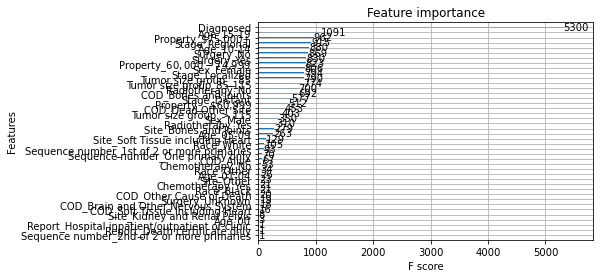

In [123]:
from xgboost import plot_importance

plot_importance(model)

## Select the best parameters for prediction

#### k=10,20,30,40?

In [124]:
from sklearn.feature_selection import SelectKBest, f_classif
#f_classif, Compute the ANOVA F-value for the provided sample. - savetuje se kada su numericki atributi, a kategorijalna klasa

sb = SelectKBest(score_func=f_classif, k=40).fit(training[features1], training['Survive'])
train_x_vectors_new = sb.transform(training[features1])
sb.get_support(indices=True)

C:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [33] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 34, 35, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46], dtype=int64)

In [125]:
df_ohe.columns[sb.get_support(indices=True)].tolist()

['Diagnosed',
 'Survive',
 'Age_00',
 'Age_01-04',
 'Age_10-14',
 'Age_15-19',
 'Race_Black',
 'Race_Other',
 'Race_White',
 'Sex_Female',
 'Sex_Male',
 'Stage_Distant',
 'Stage_Localized',
 'Stage_Regional',
 'Site_Bones and Joints',
 'Site_Kidney and Renal Pelvis',
 'Site_Other',
 'Site_Soft Tissue including Heart',
 'Sequence number_3rd of 3 or more primaries',
 'Sequence number_One primary only',
 'COD_Alive',
 'COD_Bones and Joints',
 'COD_Brain and Other Nervous System',
 'COD_Dead Other Site',
 'COD_Other Cause of Death',
 'COD_Soft Tissue including Heart',
 'Report_Death certificate only',
 'Report_Hospital inpatient/outpatient or clinic',
 'Report_Radiation treatment or medical oncology center (2006+)',
 'Property_$60,000 - $74,999',
 'Property_< $60,999',
 'Tumor size group_85-115',
 'Tumor size group_< 85',
 'Tumor size group_> 115',
 'Surgery_No',
 'Surgery_Unknown',
 'Surgery_Yes',
 'Chemotherapy_No',
 'Chemotherapy_Yes',
 'Radiotherapy_No']

In [100]:
df_ohe.columns.size

48

## Using Random forest to select best parameters

Optimalan broj atributa : 4


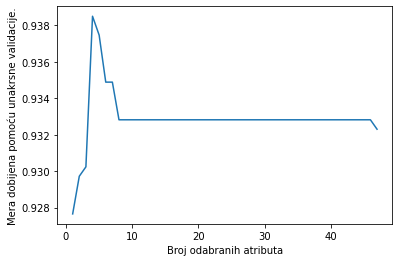

In [126]:
dtree_clf = tree.DecisionTreeClassifier(max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
rfecv = RFECV(estimator=dtree_clf, cv=StratifiedKFold(5), scoring='f1_micro')

rfecv.fit(training[features1], training['Survive'])

print("Optimalan broj atributa : %d" % rfecv.n_features_)

#Prikazujemo broj atributa i rezultate unakrsne validacije 
plt.figure()
plt.xlabel("Broj odabranih atributa")
plt.ylabel("Mera dobijena pomoću unakrsne validacije.")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [127]:
features1[rfecv.support_]

Index(['Diagnosed', 'Sequence number_1st of 2 or more primaries', 'COD_Alive',
       'COD_Other Cause of Death'],
      dtype='object')

In [ ]:
#### optimizacija hiperparametara

In [128]:
from sklearn.model_selection import GridSearchCV

#tuned_svm = svm.SVC()
svm.SVC()

SVC()

In [27]:
df.to_csv('ml-final.csv', index= False)